# Summary

This is  forth and last step in the process.

Here we will  do following

* Import the  cleaned, feature engineered and tranformed data
* Split data in  75 /25  traning and test data
* Build a linear regression model with selected features that  give optimum performance
* Evluate the error using RMSE and R2 score as measure .
* Run the actual test data through model and predict the sale price.
* Save the predicted results to a file 'ames_pred.csv' under submission folder  to be uploaded for  Kaggle evluations

In [5]:
# import packages
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# impport  data
train_input_file = "./submission/train_cleaned_ord.csv"
test_input_file ="./submission/test_cleaned_ord.csv"
train_df = pd.read_csv(train_input_file)
test_df =pd.read_csv(test_input_file)

######  Sanity check that there is no missing data.

In [7]:
column_null_counts = test_df.isnull().sum() *100/ len(test_df) #Filter to find missing data in percetage 
missing_data_columns =column_null_counts[column_null_counts >0] # get only columns where missing data  >0
missing_data_columns.sort_values(ascending=False) # display them in highest missing data at top

Garage Yr Blt    0.113895
dtype: float64

In [16]:
#TODO : try log transformations on features
# train_df['2nd Flr SF']=np.log(train_df['2nd Flr SF'])
# train_df['Bsmt Unf SF']=np.log(train_df['Bsmt Unf SF'])
# # train_df['BsmtFin SF 1']=np.log(train_df['BsmtFin SF 1'])
# train_df['BsmtFin SF 2']=np.log(train_df['BsmtFin SF 2'])
# # train_df['Enclosed Porch']=np.log(train_df['Enclosed Porch'])
# train_df['Lot Frontage']=np.log(train_df['Lot Frontage'])
# # train_df['Mas Vnr Area']=np.log(train_df['Mas Vnr Area'])


# test_df['2nd Flr SF']=np.log(train_df['2nd Flr SF'])
# test_df['Bsmt Unf SF']=np.log(train_df['Bsmt Unf SF'])
# # train_df['BsmtFin SF 1']=np.log(train_df['BsmtFin SF 1'])
# test_df['BsmtFin SF 2']=np.log(train_df['BsmtFin SF 2'])
# # train_df['Enclosed Porch']=np.log(train_df['Enclosed Porch'])
# test_df['Lot Frontage']=np.log(train_df['Lot Frontage'])
# # train_df['Mas Vnr Area']=np.log(train_df['Mas Vnr Area'])

In [9]:
# Our secret sauce of features that will  be fed in to the  Model 
features =[
'ordinal_Overall Qual','Gr Liv Area','Garage Area','Total Bsmt SF',
'1st Flr SF','ln_house_age','Year Remod/Add','Full Bath', 'TotRms AbvGrd',
'Mas Vnr Area', 'Fireplaces','BsmtFin SF 1','Lot Area','Open Porch SF',
'Lot Frontage','Wood Deck SF','Half Bath','f_has_open_porch','f_has_wooden_deck',

'ordinal_Exter Qual','ordinal_Kitchen Qual','ordinal_Bsmt Qual','ordinal_Bsmt Exposure',
'ordinal_Fireplace Qu','ln_house_age','ordinal_Electrical',
'f_tot_porches','Enclosed Porch','ordinal_Overall Cond','nominal__Inside',
'Low Qual Fin SF','nominal__FR2','nominal__RRNe',
 
'ordinal_Fence','nominal__Oth','nominal__ConLw'
]

###### Features  showed up on  co-relation matric but didn not offer improvements    
'nominal_garage__Detchd' ,'nominal_garage__N_A','nominal_garage__CarPort' ,nominal__Y','nominal__GasW','Misc Val',
ord_Bsmt Exposure, 'nominal__None','nominal__Norm','nominal__PosN',nominal__Feedr.1','nominal__OthW',    'ordinal_Paved Drive' 


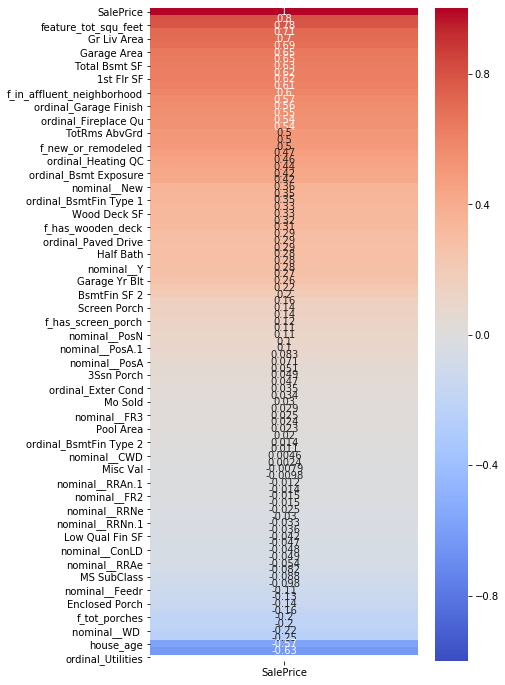

In [10]:
apps_core = train_df.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False)
plt.figure(figsize=(6,12))  # 6 by 12 inch to make plot bigger
sns.heatmap(apps_core, vmin=-1,vmax=1,cmap='coolwarm',annot=True);

#  Build Model 

In [11]:
X =train_df[features]  # . Features
y_orig =train_df['SalePrice']  # target variable

y=np.log(train_df['SalePrice']) # . Transform to adjust right skewness
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr =LinearRegression()
lr.fit(X_train,y_train);


# Evaluate Model - with R2 score as loss function

In [12]:
train_score= lr.score(X_train,y_train)
test_score = lr.score(X_test,y_test)
cvs =cross_val_score(lr,X_train,y_train,cv=5).mean()

print(f"\ntrain R2 score ={train_score}, \ncross_val_score= {cvs}\ntest R2 score ={test_score}")


train R2 score =0.8587216537934146, 
cross_val_score= 0.8394628652019798
test R2 score =0.866208676425907


# Evaluate Model - with RMSE  score as loss function

In [13]:
y_hat =lr.predict(X)
y_hat_orig = np.exp(y_hat)
rmse= np.sqrt(metrics.mean_squared_error(y_orig,y_hat_orig ))
print(f"RMSE (equivalent Kaggle score={rmse}, standard deviation =y_orig.std()")

RMSE (equivalent Kaggle score=42806.63760086686, standard deviation =y_orig.std()


#  predict the  Sale prices for  actual  kaggle test data 

In [14]:
X_kaggle_test =test_df[features]
test_df['SalePrice_log'] =lr.predict(X_kaggle_test)
test_df['SalePrice'] =np.exp(test_df['SalePrice_log'])                     

# Export the Kaggle submission file to hard disk

In [15]:
test_df[['Id' ,'SalePrice']].to_csv('./submission/ames_pred.csv',index=False)